<a href="https://colab.research.google.com/github/JoshuaHaga/covid_tracking_project/blob/master/Harrisonburg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

In [19]:
#Libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [20]:
!pip install sodapy

In [21]:
###Data import API
from sodapy import Socrata
client = Socrata("data.virginia.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.virginia.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
va_cases = client.get("bre9-aqqr", limit=2000)
va_cases_zip = client.get("8bkr-zfqv", limit=2000)

# Convert to pandas DataFrame
va_locality_cases = pd.DataFrame.from_records(va_cases)
va_cases_zip = pd.DataFrame.from_records(va_cases_zip)

In [22]:
###Must run for visualizations
!pip install plotly==4.9.0

In [38]:
#Dependencies for chloropleth
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [24]:
#Chart studio is required in order to embed the charts
!pip install chart_studio

In [25]:
#Plotly embed dependencies. API crednetials can be replaced by your own with a free account. 
import plotly
import chart_studio
import chart_studio.plotly as py
username = 'josh.haga' # your username
api_key = '6bgoxTaL6JLm9a9DquYX' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [26]:
###Datasets
###va_locality_cases = pd.read_csv('https://raw.githubusercontent.com/JoshuaHaga/covid_tracking_project/master/VDH-COVID-19-PublicUseDataset-Cases.csv')
###va_cases_zip      = pd.read_csv('https://raw.githubusercontent.com/JoshuaHaga/covid_tracking_project/master/VDH-COVID-19-PublicUseDataset-ZIPCode.csv')

#Exploration

In [27]:
va_cases_zip.head()

,report_date,zip_code,number_of_cases,number_of_pcr_testing
0,2020-09-08T00:00:00.000,20105,223,4263
1,2020-09-08T00:00:00.000,20106,69,545
2,2020-09-08T00:00:00.000,20109,1587,8884
3,2020-09-08T00:00:00.000,20110,1985,11306
4,2020-09-08T00:00:00.000,20111,1309,7467


In [28]:
###Filter for just harrisonburg
harrison_zip = [22801,22802,22803,22807]
harrison_cases = va_cases_zip[va_cases_zip['zip_code'].isin(['22801','22802','22803','22807'])]
#harrison_cases

###va_locality_cases

In [80]:
###Convert to datetime
va_locality_cases['report_date'] = pd.to_datetime(va_locality_cases['report_date'])

In [ ]:
va_locality_cases['report_date'] = va_locality_cases['report_date'].dt.date

In [83]:
va_locality_cases

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths
0,2020-09-08,51001,Accomack,Eastern Shore,1154,87,19
1,2020-09-08,51003,Albemarle,Thomas Jefferson,1096,69,19
2,2020-09-08,51005,Alleghany,Alleghany,71,8,4
3,2020-09-08,51007,Amelia,Piedmont,110,13,3
4,2020-09-08,51009,Amherst,Central Virginia,325,10,1
...,...,...,...,...,...,...,...
1995,2020-08-24,51001,Accomack,Eastern Shore,1135,88,18
1996,2020-08-24,51003,Albemarle,Thomas Jefferson,963,64,16
1997,2020-08-24,51005,Alleghany,Alleghany,61,7,4
1998,2020-08-24,51007,Amelia,Piedmont,92,13,2


In [34]:
#va_comb = pd.merge(va_locality_cases,va_cases_zip, on=)

SyntaxError: ignored

In [84]:
va_locality_cases['report_date'].describe()

count           2000
unique            16
top       2020-08-31
freq             133
Name: report_date, dtype: object

In [85]:
current_cases = va_locality_cases[va_locality_cases['report_date'] == va_locality_cases['report_date'].max()]

In [86]:
va_county_cases_fig = px.choropleth(va_locality_cases, geojson=counties, locations='fips', color='Total Cases',
 color_continuous_scale='portland',
 range_color=(va_locality_cases['total_cases'].min(), va_locality_cases['total_cases'].mean()*4),
 scope='usa',
 labels={'color':'Current Covid Cases',
         'Locality':'County',
         }
 )
va_county_cases_fig.update_geos(fitbounds="locations", visible=False)
va_county_cases_fig.update_layout(
    title_text = 'Positive Results by County in VA'
)
va_county_cases_fig.show()
#va_county_cases_fig.write_html('/content/full_map.html')

TypeError: ignored

In [52]:
def rolling_seven_avg(df,locality,feature,days):
  df = df[df['locality']==locality]
  df['new_cases'] = df[feature].astype(int).diff()
  rolling_avg = df['new_cases'].rolling(window=days).mean()
  df['rolling_avg'] = rolling_avg
  return df
 

In [45]:
def col_list(dataframe):
  val_counts = dataframe.value_counts()
  val_as_pd  = pd.DataFrame(val_counts).T
  val_list   = val_as_pd.columns.tolist()
  return val_list

In [53]:
harrison = rolling_seven_avg(va_locality_cases,'Harrisonburg','total_cases',7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



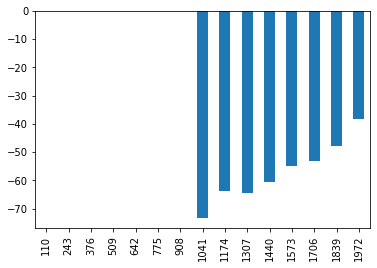

In [70]:
harrison['rolling_avg'].plot(kind='bar',)

In [71]:
harrisonburg_sevenday_rolling = px.bar(harrison, x='report_date', y='rolling_avg',
                                       labels={'rolling_avg':'Number of Positive Cases', 
                                      'report_date':'Date',})
harrisonburg_sevenday_rolling.show()

ValueError: ignored

In [63]:
py.plot(harrisonburg_sevenday_rolling, filename = 'harrisonburg_sevenday_rolling', auto_open=True)

NameError: ignored

In [65]:
augusta = rolling_seven_avg(va_locality_cases,'Augusta','total_cases',7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
augusta_sevenday_rolling = px.bar(augusta, x='Report Date', y='rolling_avg',
                                  labels={'rolling_avg':'Number of Positive Cases', 
                                      'Report Date':'Date',
                                      })
#augusta_sevenday_rolling.show()

ValueError: ignored

# Visualizations

###Harrisonburg 7 day Rolling Avg

In [67]:
harrisonburg_sevenday_rolling.show()

NameError: ignored

In [ ]:
####Link to embed Harrisonburg 7 day Rolling Avg
py.plot(harrisonburg_sevenday_rolling, filename = 'harrisonburg_sevenday_rolling', auto_open=True)

###VA Cases by county 

In [ ]:
va_county_cases_fig.show()

In [ ]:
#py.plot(va_county_cases_fig, filename = 'va_county_cases_fig', auto_open=True)